##Reference

In [ ]:
https://scikit-learn.org/stable/
https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c

# Imports

In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import itertools #logistic iteration
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.preprocessing import StandardScaler #scale data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
import seaborn as sns # visualizations
from sklearn import metrics # evaluation metric

#Reading Data And Sampling

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('//content/drive/MyDrive/gdb9.sdf.csv')

QM9_PARAMETER = ['lumo','A','B','C','mu','alpha','homo','gap','r2','zpve','u0','u298','h298','g298','cv','u0_atom','u298_atom','h298_atom','g298_atom']
QM9_TASK = "lumo"
df = pd.DataFrame(data,columns= QM9_PARAMETER) # dataframe

df4mem = df.sample(n=100000, random_state=1) # For memory limit   
df4mem

,lumo,A,B,C,mu,alpha,homo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
18961,0.0620,6.39212,1.39227,1.37870,1.5229,67.97,-0.2235,0.2855,949.0938,0.141268,-363.735719,-363.728810,-363.727866,-363.766881,26.824,-1571.401763,-1582.175465,-1591.659008,-1457.205792
129792,-0.0003,3.57442,1.63525,1.12877,6.2758,69.88,-0.2106,0.2103,990.5980,0.105544,-429.062919,-429.055826,-429.054882,-429.094309,27.101,-1415.133824,-1423.125151,-1430.829079,-1317.719327
21271,0.0452,5.14363,1.51086,1.17793,1.9078,59.64,-0.2020,0.2472,966.6280,0.109261,-412.062993,-412.055362,-412.054418,-412.094935,27.338,-1330.956629,-1338.609729,-1346.314284,-1236.382238
22254,0.0161,2.06848,1.17727,0.97893,0.4357,88.19,-0.2409,0.2570,1413.1686,0.214318,-405.523969,-405.512574,-405.511630,-405.559846,42.231,-2161.159821,-2175.339015,-2188.972903,-2000.682552
83334,0.0776,2.01919,1.61917,1.48175,1.1963,84.88,-0.2535,0.3312,1105.7433,0.206339,-388.290014,-388.280948,-388.280003,-388.322760,36.327,-2163.297744,-2178.050481,-2191.090746,-2007.849332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103025,0.0276,2.34411,1.73056,1.18623,3.2086,80.35,-0.2461,0.2737,1087.3239,0.160504,-382.020370,-382.012064,-382.011120,-382.053203,31.937,-1833.903838,-1845.578643,-1856.247551,-1704.891752
47731,-0.0274,2.52287,1.65288,1.13653,1.9478,75.68,-0.2210,0.1936,1091.7514,0.162135,-419.203332,-419.195437,-419.194493,-419.235793,30.831,-1812.038287,-1823.970370,-1834.639278,-1682.536744
83616,0.0735,2.35578,1.84979,1.22713,1.3151,82.15,-0.2437,0.3172,1075.3774,0.183657,-387.045600,-387.037590,-387.036646,-387.077990,32.240,-2010.268380,-2023.906660,-2035.761560,-1867.967536
87429,0.0564,3.40552,1.51796,1.29534,2.3792,75.03,-0.2307,0.2871,1005.7548,0.147518,-401.847645,-401.839964,-401.839020,-401.879920,30.047,-1737.788284,-1748.966729,-1759.042641,-1615.163613


In [ ]:
df4mem.iloc ["gap"] > 0.5

TypeError: ignored

# Correlation Matrix

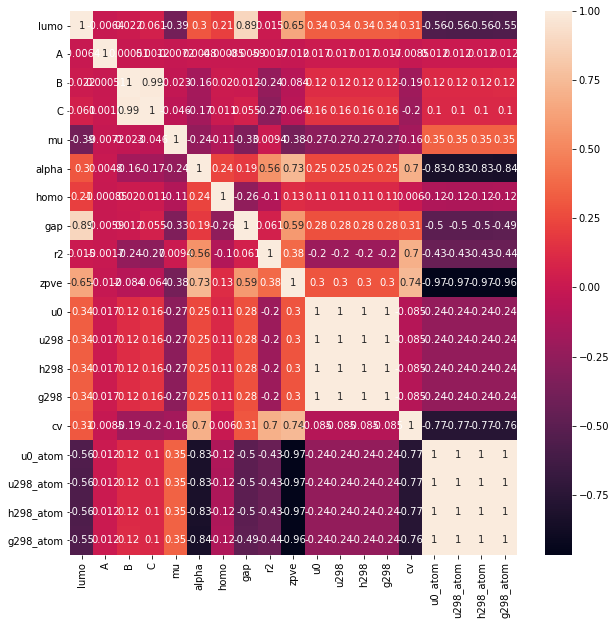

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df4mem.corr(), annot=True)

## Remove Duplicates

In [ ]:
df4mem.drop(columns=['C','u298','h298','g298','u298_atom','h298_atom','g298_atom'],inplace=True)

In [ ]:
df4mem.shape

(100000, 12)

In [ ]:
df4mem.describe()

,lumo,A,B,mu,alpha,homo,gap,r2,zpve,u0,cv,u0_atom
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.011058,11.969520,1.406001,2.705180,75.199487,-0.239966,0.251023,1190.009416,0.148527,-411.565047,31.606650,-1750.954040
std,0.046932,2093.706658,1.736837,1.524677,8.175229,0.022128,0.047513,279.794781,0.033261,40.073252,4.055235,239.035098
min,-0.175000,0.000000,0.337120,0.000000,6.310000,-0.428600,0.037600,19.000200,0.015951,-714.568061,6.002000,-2608.448864
25%,-0.023800,2.554655,1.090923,1.589100,70.370000,-0.252500,0.216200,1018.911075,0.125297,-437.919540,28.953750,-1904.582059
50%,0.011900,3.090810,1.369255,2.501900,75.500000,-0.241000,0.249300,1147.851100,0.148311,-417.097668,31.562000,-1753.033929
75%,0.049025,3.836062,1.653152,3.637300,80.520000,-0.228700,0.288000,1308.635600,0.171136,-387.048808,34.270000,-1597.322434
max,0.193500,619867.683140,437.903860,25.202200,143.530000,-0.101700,0.622100,3374.753200,0.273944,-56.525887,46.969000,-213.087624


In [ ]:
df4mem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 18961 to 98268
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   lumo     100000 non-null  float64
 1   A        100000 non-null  float64
 2   B        100000 non-null  float64
 3   mu       100000 non-null  float64
 4   alpha    100000 non-null  float64
 5   homo     100000 non-null  float64
 6   gap      100000 non-null  float64
 7   r2       100000 non-null  float64
 8   zpve     100000 non-null  float64
 9   u0       100000 non-null  float64
 10  cv       100000 non-null  float64
 11  u0_atom  100000 non-null  float64
dtypes: float64(12)
memory usage: 9.9 MB


# Investigate Missing Values

In [ ]:
df4mem.isna().sum()

lumo       0
A          0
B          0
mu         0
alpha      0
homo       0
gap        0
r2         0
zpve       0
u0         0
cv         0
u0_atom    0
dtype: int64

# Train Test Split

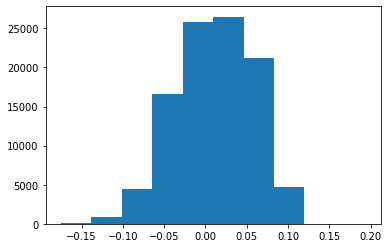

In [ ]:
plt.hist(df4mem['lumo'])
plt.show()

In [ ]:
X = df4mem.drop(QM9_TASK,axis=1)
y = np.asarray(df4mem[QM9_TASK] > 0.0,
               dtype=np.uint8)

y

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True) # set the test size to 0.2 is 20% while the model training 

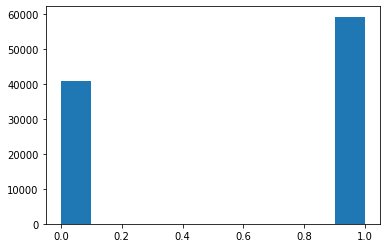

In [ ]:
plt.hist(y)
plt.show()

# Fitting Models

## Logistic Regression

Train Accuracy is : 
 0.8413 

Test Accuracy is : 
 0.8484 



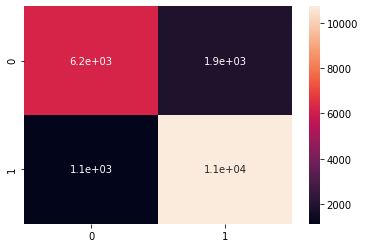

In [ ]:
logistic_regression= LogisticRegression(max_iter=1500,solver='liblinear')
logistic_regression.fit(X_train,y_train)
y_pred_train=logistic_regression.predict(X_train)
y_pred_test=logistic_regression.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_, annot=True)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
plt.show()

In [ ]:
score_ = cross_val_score(logistic_regression, X, y, cv = 10)
score_

array([0.8744, 0.9254, 0.8762, 0.8916, 0.8635, 0.8643, 0.8628, 0.9258,
       0.8044, 0.9048])

In [ ]:
score_.mean()

0.8793200000000001

## KNN

In [ ]:
train_scores = {}
test_scores = {}
range_K = range(3,23,2)
for K in range_K:
    knn_classifier = KNeighborsClassifier(n_neighbors = K)
    knn_classifier.fit(X_train, y_train)
    y_pred_test = knn_classifier.predict(X_test)
    test_scores[K] = metrics.accuracy_score(y_test, y_pred_test)


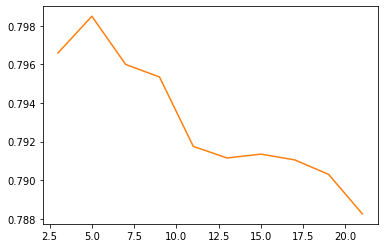

In [ ]:

plt.plot(list(train_scores.keys()),list(train_scores.values()))
plt.plot(list(test_scores.keys()),list(test_scores.values()))
plt.show()

The test accuracy is maximum at 5.


## Decision Tree Classifier

In [ ]:
parameters = {'max_depth':range(3,10),
              'max_leaf_nodes':range(5,25)}
dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree, parameters,verbose=1)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:  4.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(3, 10),
                       

In [ ]:
clf.best_params_

{'max_depth': 7, 'max_leaf_nodes': 24}

Train Accuracy is : 
 0.979575 

Test Accuracy is : 
 0.97725 



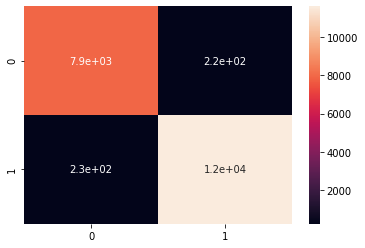

In [ ]:
y_pred_train = clf.best_estimator_.predict(X_train)
y_pred_test = clf.best_estimator_.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
sns.heatmap(confusion_matrix_, annot=True)
plt.show()

## 

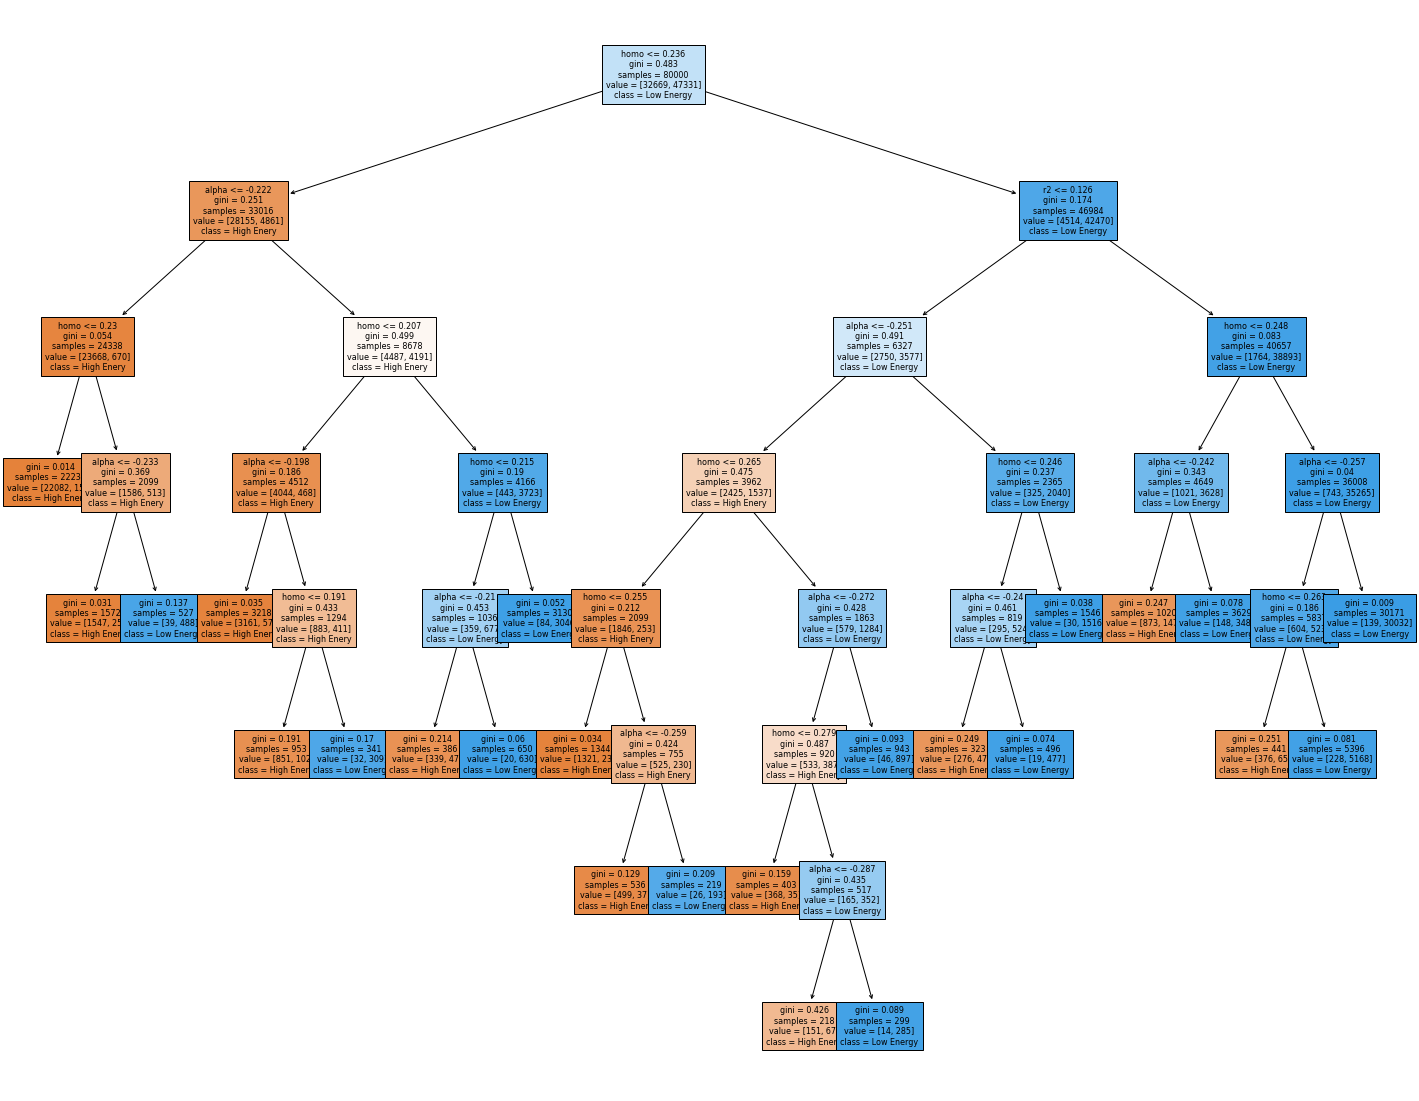

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf.best_estimator_,
              feature_names=df4mem.columns,
              class_names=['High Enery','Low Energy'],
              filled=True,
              fontsize=8)

##Scaling Data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

##SVM


Train Accuracy is : 
 0.9965625 

Test Accuracy is : 
 0.9946 



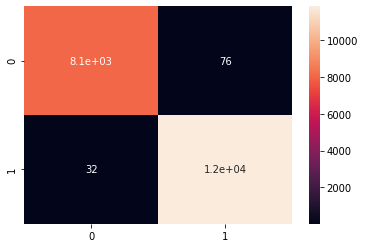

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_s,y_train)
y_pred_train = svm_classifier.predict(X_train_s)
y_pred_test = svm_classifier.predict(X_test_s)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_, annot=True)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
plt.show()

##Neural Network

Train Accuracy is : 
 0.999175 

Test Accuracy is : 
 0.99795 



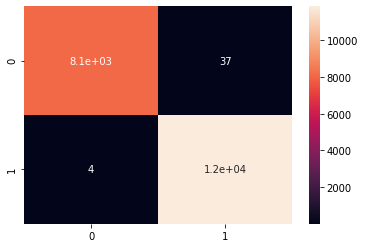

In [ ]:
nn_classifier = MLPClassifier()
nn_classifier.fit(X_train_s,y_train)
y_pred_train = nn_classifier.predict(X_train_s)
y_pred_test = nn_classifier.predict(X_test_s)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_, annot=True)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
plt.show()

##Random Forest

Train Accuracy is : 
 1.0 

Test Accuracy is : 
 0.99065 



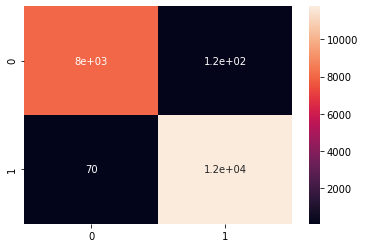

In [ ]:
random_f = RandomForestClassifier()
random_f.fit(X_train, y_train)
y_pred_train = random_f.predict(X_train)
y_pred_test = random_f.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_, annot=True)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
plt.show()

##Ada Boost


Train Accuracy is : 
 0.9860375 

Test Accuracy is : 
 0.98425 



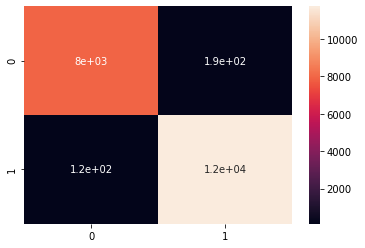

In [ ]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_train = adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_, annot=True)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
plt.show()

##Voting Classifier


Train Accuracy is : 
 0.9244625 

Test Accuracy is : 
 0.92525 



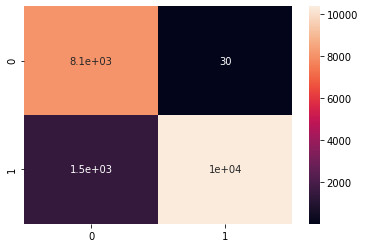

In [ ]:
voting = VotingClassifier(estimators = [("svm", SVC()), ("knn", (KNeighborsClassifier()))], voting = "hard")
voting.fit(X_train, y_train)
y_pred_train = voting.predict(X_train)
y_pred_test = voting.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix_, annot=True)
print(f"Train Accuracy is : \n { metrics.accuracy_score(y_train, y_pred_train) } \n")
print(f"Test Accuracy is : \n { metrics.accuracy_score(y_test, y_pred_test) } \n")
plt.show()